In [173]:
# # Code by Nader Ekramirad 5/6/2021
# This code is used to extract the mean spectra for each seed in the hyperspectral image. 
# The seeds were segmented as the region of interest.  To segment ROI, two masks were used to separate each seed in the image.
# The first mask was to remove the background using thresholding, so all the seed boundaries in the image were clearly defined.
# Then, a connectivity function was used to segment each individual seed from the others in the first mask.
# This function counted the connected regions for each seed and fills in every seed area in the mask to a different
# intensity value. Next, to look at each seed individually, a second mask is created by segmenting out all values that
# are not equal to intensity value of the seed of interest. 


In [ ]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2


In [174]:
## To load hyperspectral images of seeds
dark_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/NIR_Millet_REF_DARK_06_2_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/NIR_Millet_REF_DARK_06_2_2021.raw')
white_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/NIR_Millet_REF_WHITE_06_2_2021.hdr',
                      'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/NIR_Millet_REF_WHITE_06_2_2021.raw')
data_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/NIR_Millet_Plateau_R1_06_01_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Millet/NIR_Millet_Plateau_R1_06_01_2021.raw')

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


C:\Users\nek222\Anaconda3\lib\site-packages\spectral\io\envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [175]:
# To convert images to 3D numpy arrays
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())
white_nparr.shape

<ipython-input-175-d6cc5e721c2f>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  white_nparr = np.array(white_ref.load())
<ipython-input-175-d6cc5e721c2f>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dark_nparr = np.array(dark_ref.load())
<ipython-input-175-d6cc5e721c2f>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_nparr = np.array(data_ref.load())


(342, 320, 256)

ImageView object:
  Display bands       :  (20, 20, 20)
  Interpolation       :  <default>
  RGB data limits     :
    R: [125.0, 292.0]
    G: [125.0, 292.0]
    B: [125.0, 292.0]

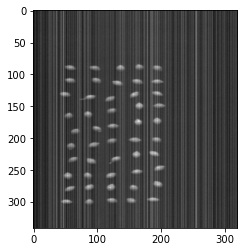

In [176]:
# To show a 2D grayscale image at a specific wavelength 
imshow(data_nparr, (20, 20, 20))

In [177]:
# To crop the image array 
white_nparr = white_nparr[50:330,:,:]
dark_nparr = dark_nparr[50:330,:,:]
data_nparr = data_nparr[50:330,:,:] 

ImageView object:
  Display bands       :  (20, 20, 20)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.16862745583057404, 0.38823530077934265]
    G: [-0.16862745583057404, 0.38823530077934265]
    B: [-0.16862745583057404, 0.38823530077934265]

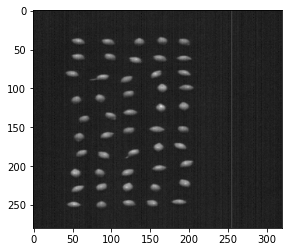

In [190]:
# To calibrate the target image using white and dark reference images
corrected_nparr = np.divide(np.subtract(data_nparr, dark_nparr), np.subtract(white_nparr, dark_nparr))
corrected_nparr = np.subtract(data_nparr, dark_nparr)/255

imshow(corrected_nparr, (20, 20, 20))

(280, 320)

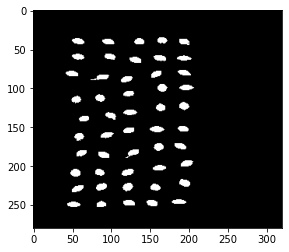

In [194]:
# To build a mask image by thresholding to remove the background
img = corrected_nparr[:,:,50]
mask = img > .009
imshow(mask)
mask.shape

C:\Users\nek222\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
       50], dtype=object)

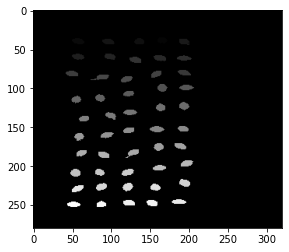

In [180]:
# To segment each seed a connectivity function was used to count the connected regions for each seed
# and fill in every seed area in the mask to a different intensity value.  

import sys
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer
import skimage.measure
import skimage.color
labeled_image = skimage.measure.label(mask, connectivity=2, return_num=True)
labeled_image
labeled_image = np.asarray(labeled_image)

labeled_seeds_img = labeled_image[0]
imshow(labeled_seeds_img)
labeled_image

(280, 320)

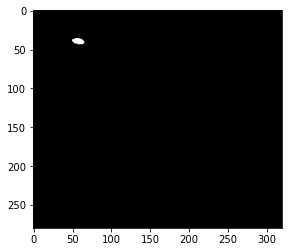

In [181]:
# To create a second mask by segmenting out all values that are not equal to intensity value of the seed of interest.

img = corrected_nparr[:,:,50]
mask2 = labeled_seeds_img == 2
imshow(mask2)
mask.shape

C:\Users\nek222\Anaconda3\lib\site-packages\spectral\graphics\spypylab.py:761: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(**kwargs)


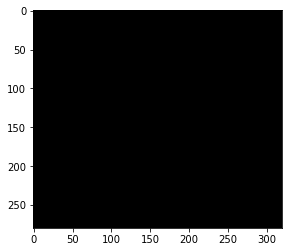

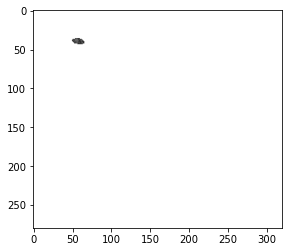

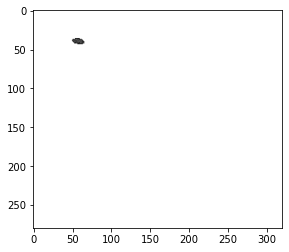

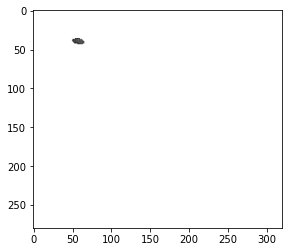

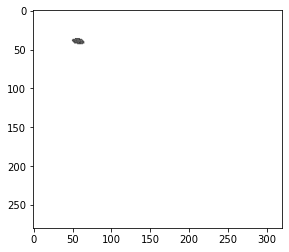

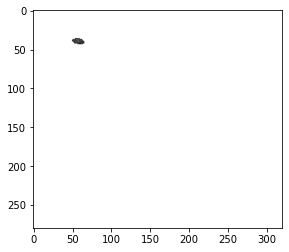

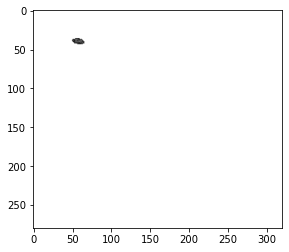

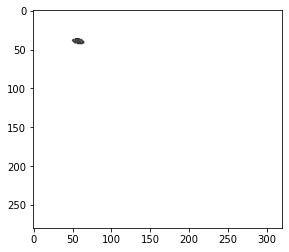

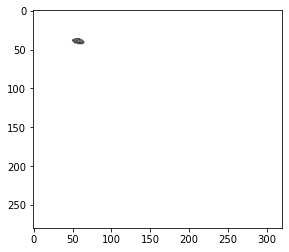

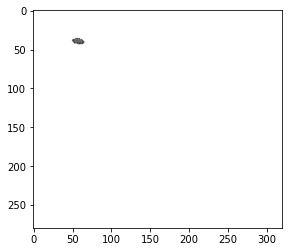

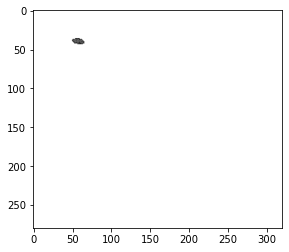

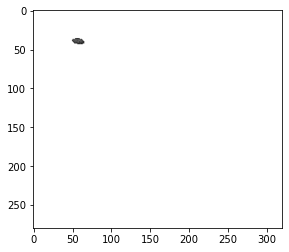

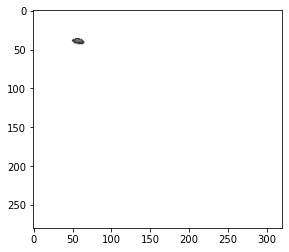

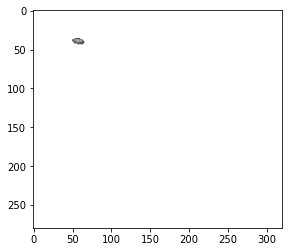

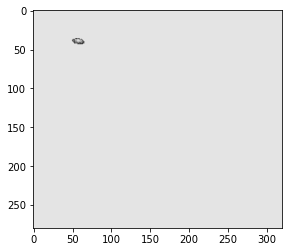

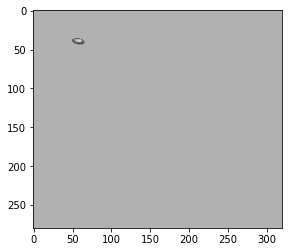

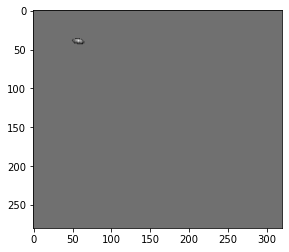

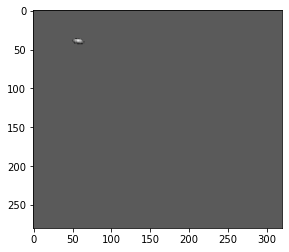

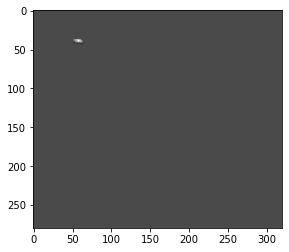

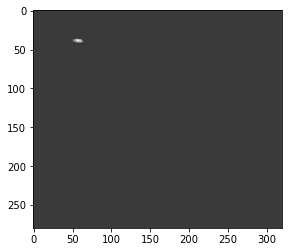

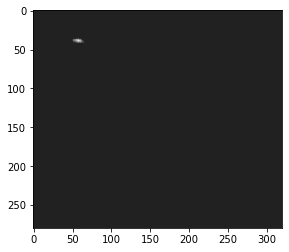

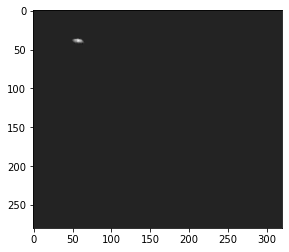

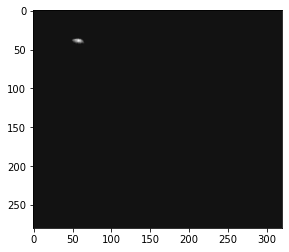

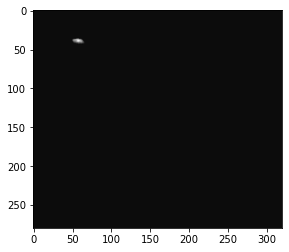

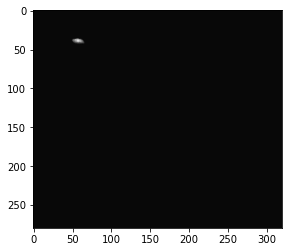

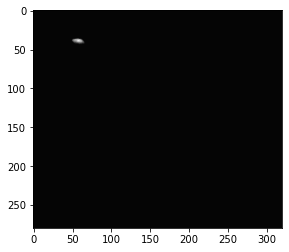

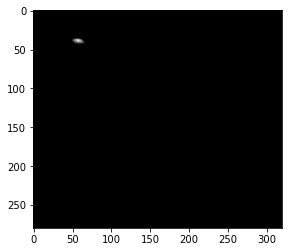

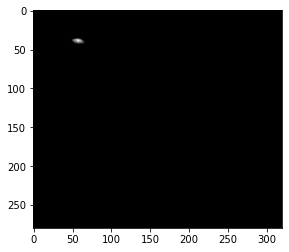

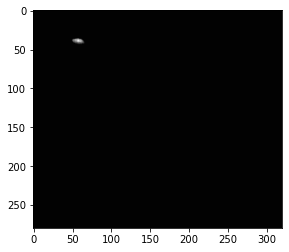

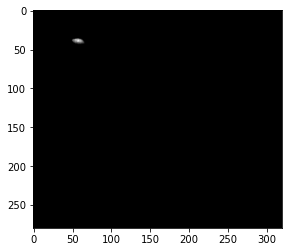

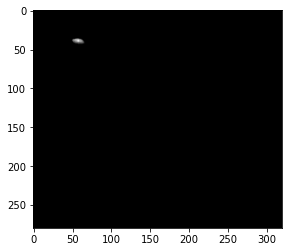

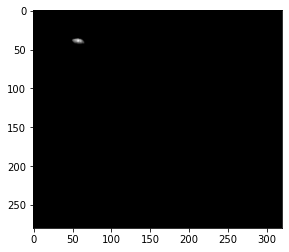

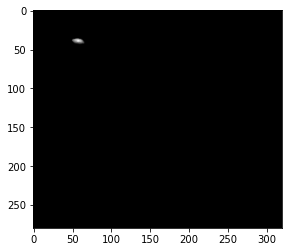

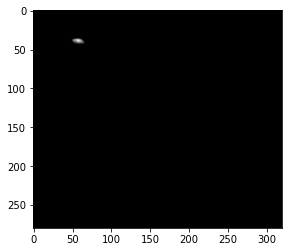

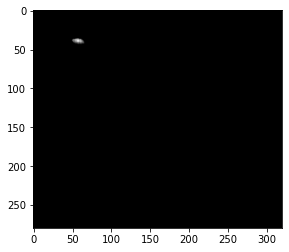

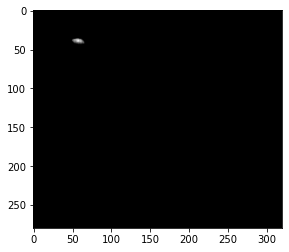

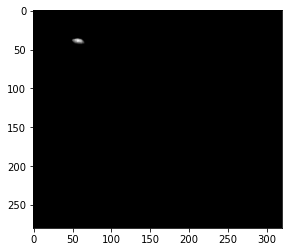

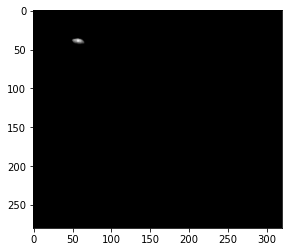

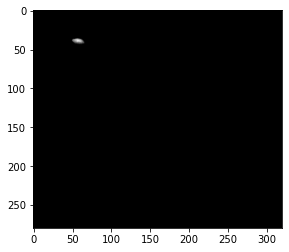

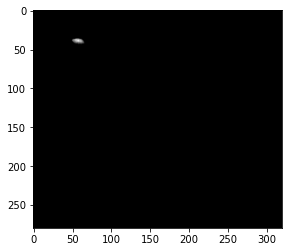

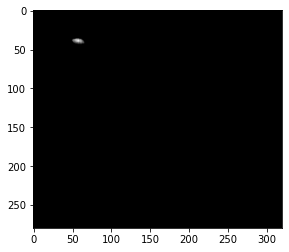

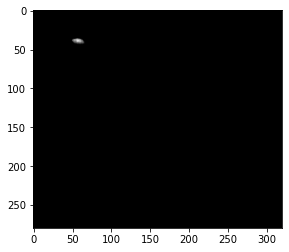

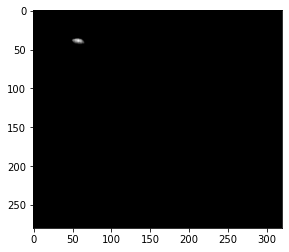

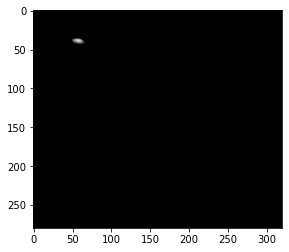

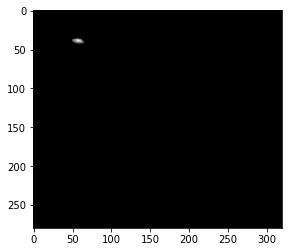

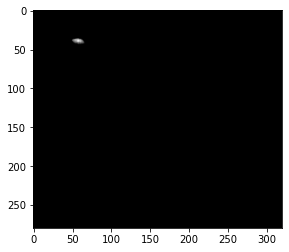

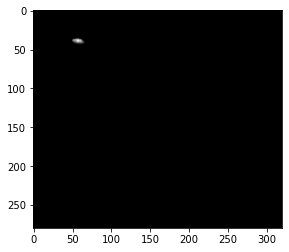

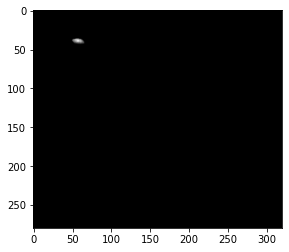

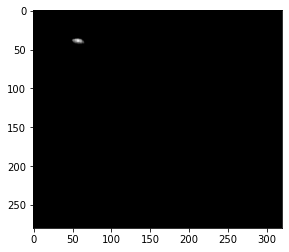

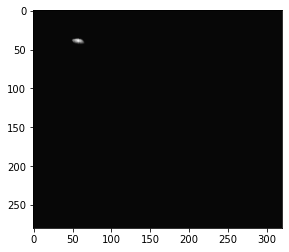

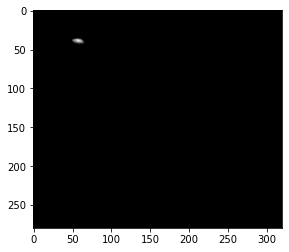

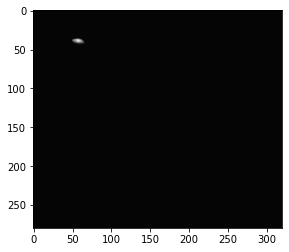

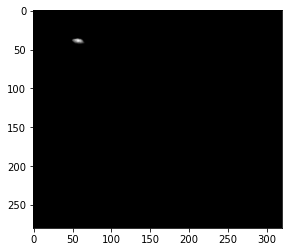

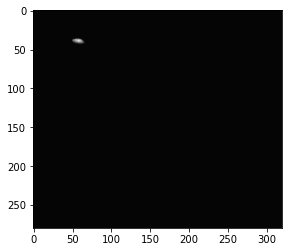

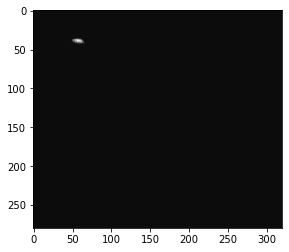

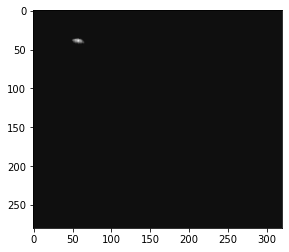

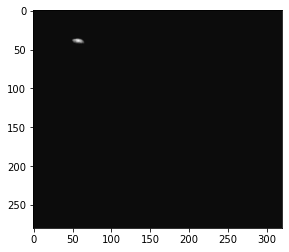

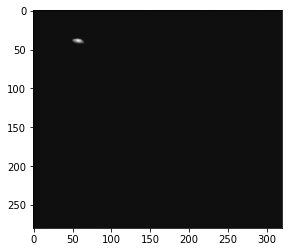

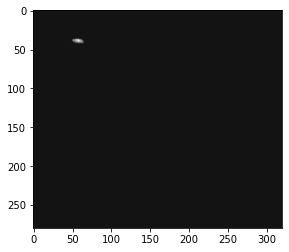

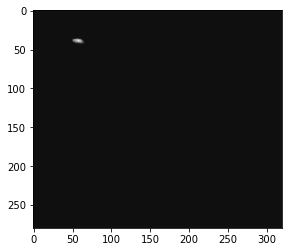

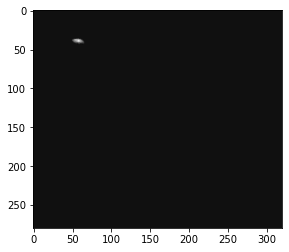

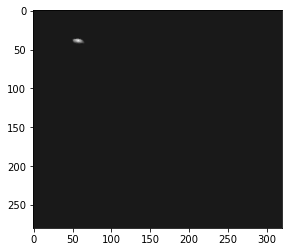

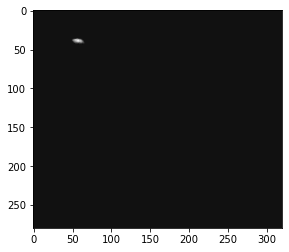

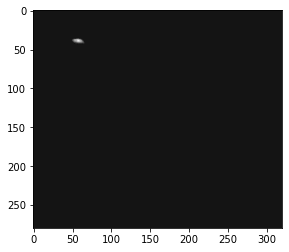

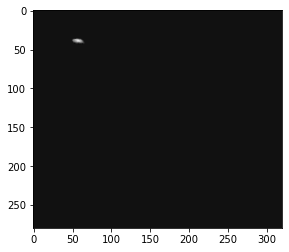

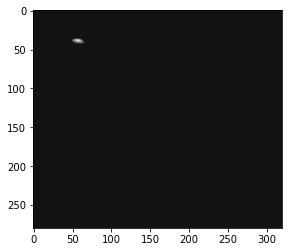

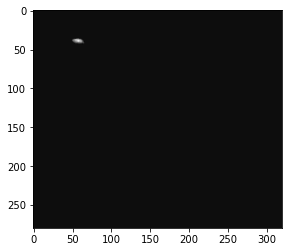

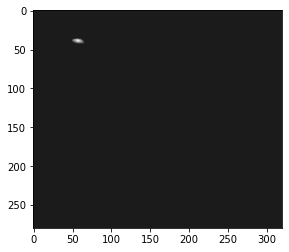

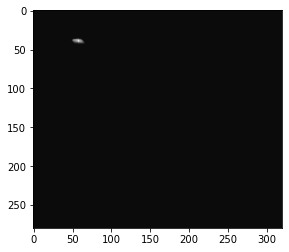

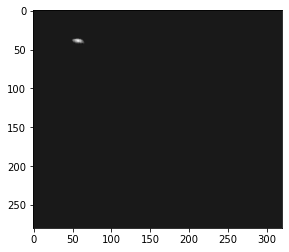

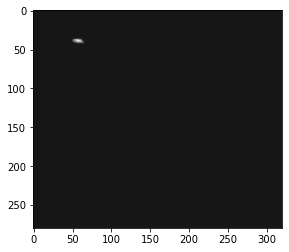

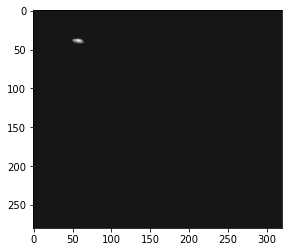

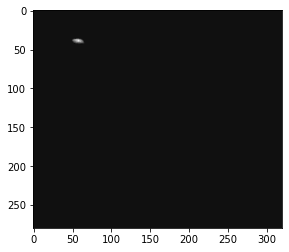

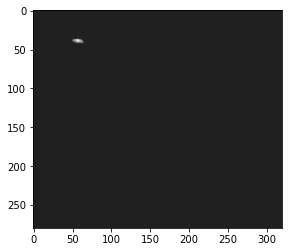

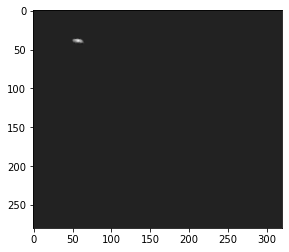

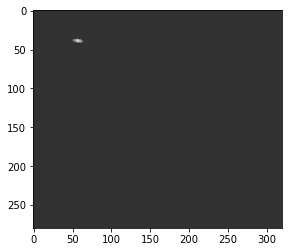

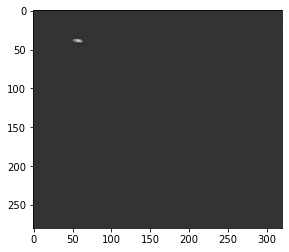

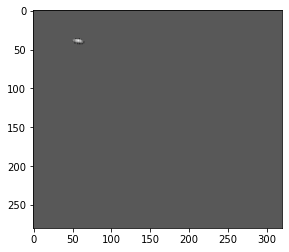

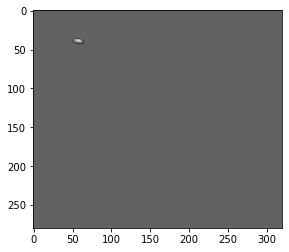

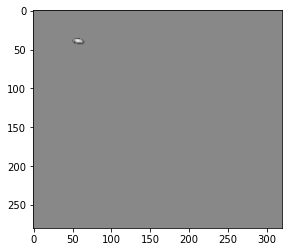

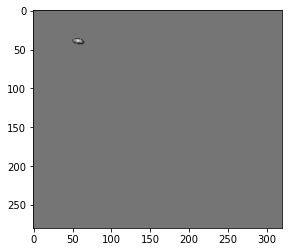

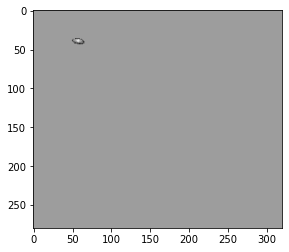

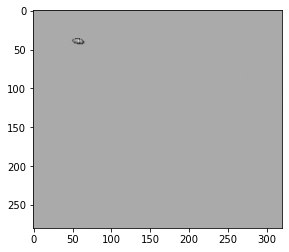

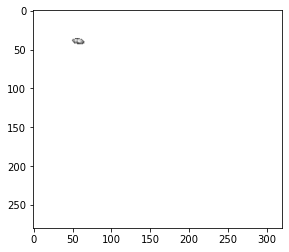

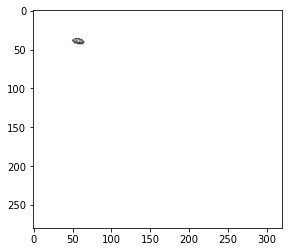

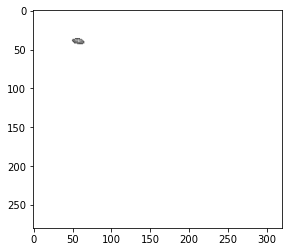

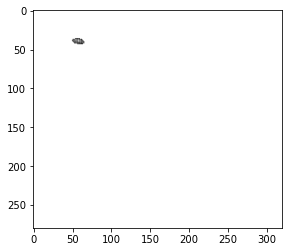

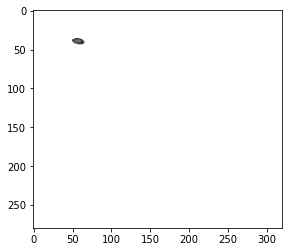

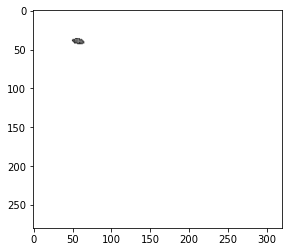

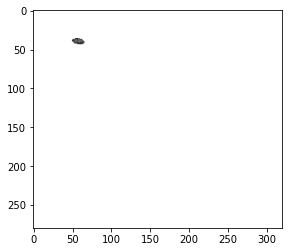

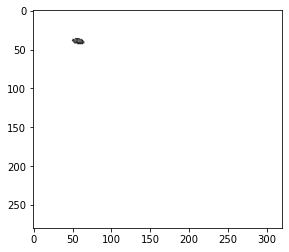

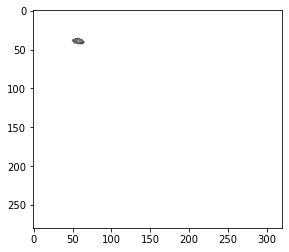

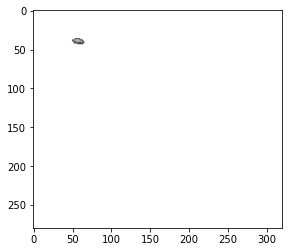

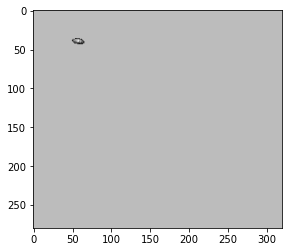

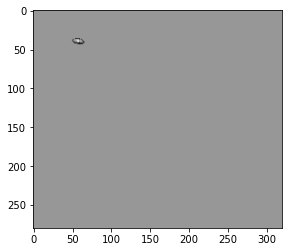

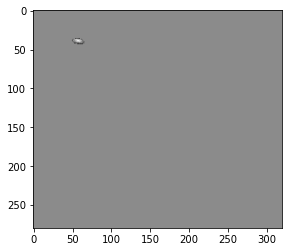

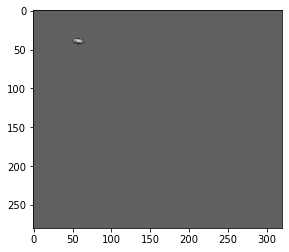

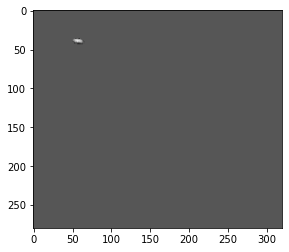

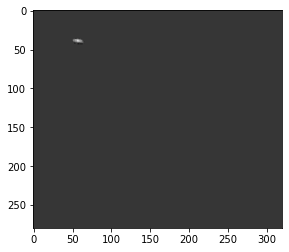

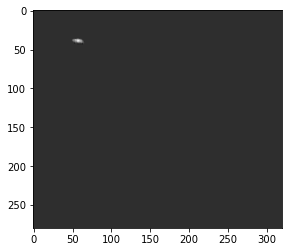

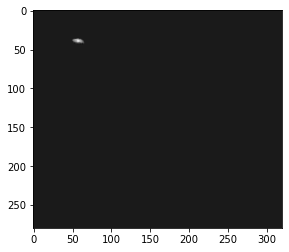

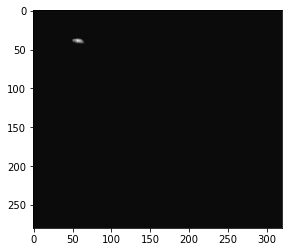

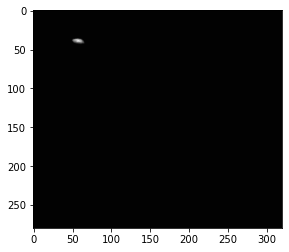

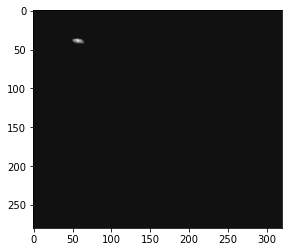

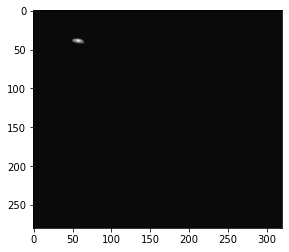

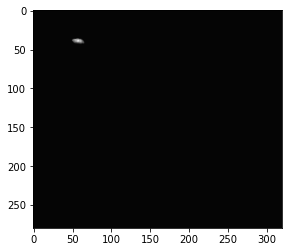

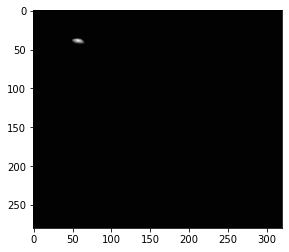

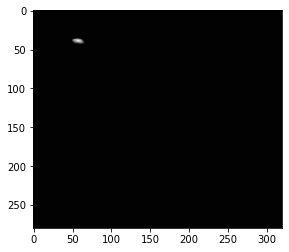

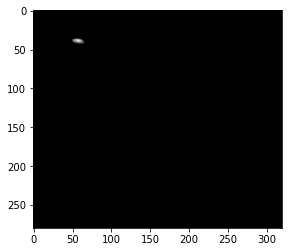

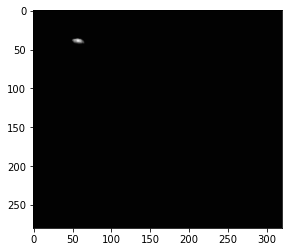

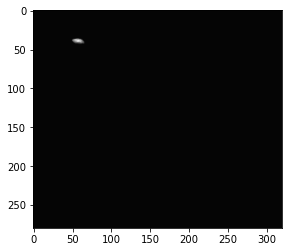

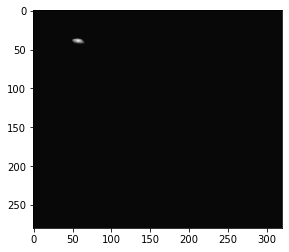

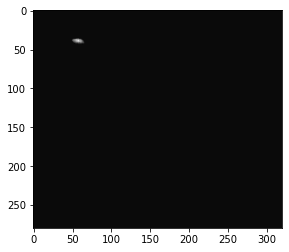

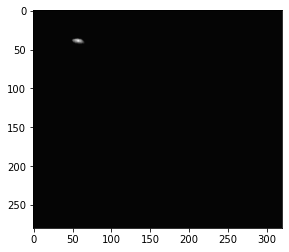

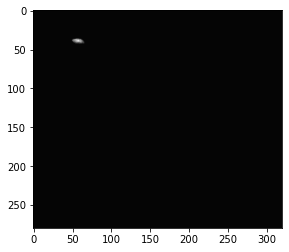

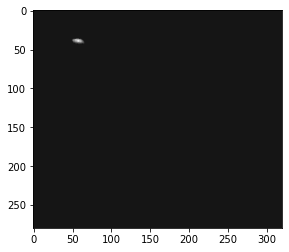

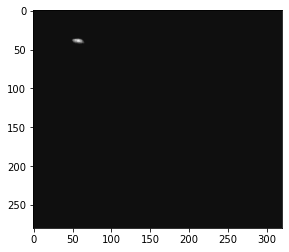

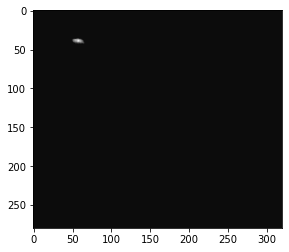

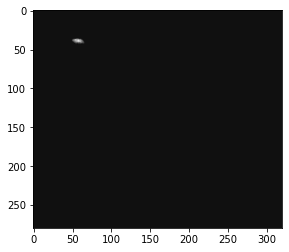

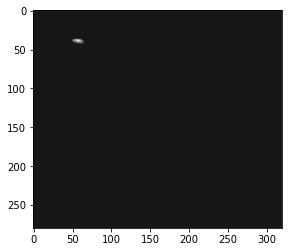

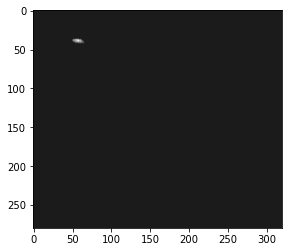

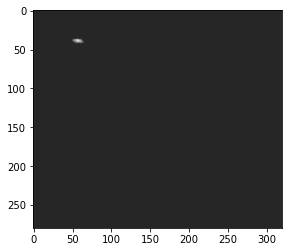

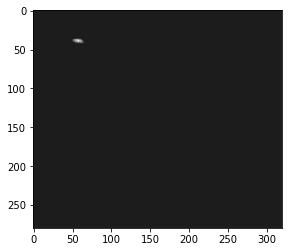

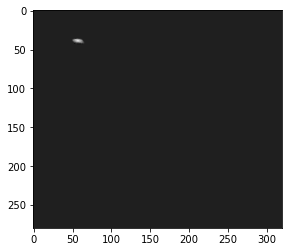

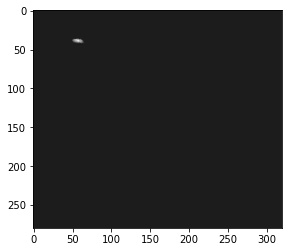

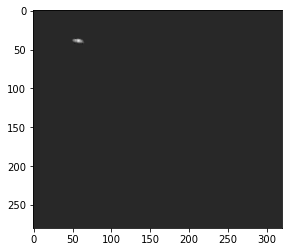

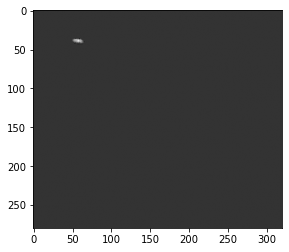

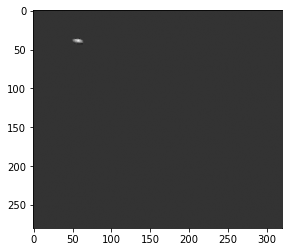

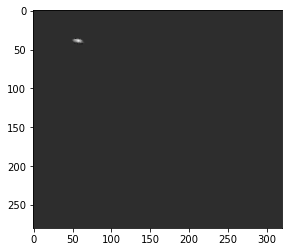

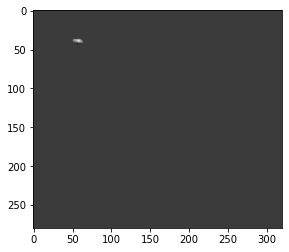

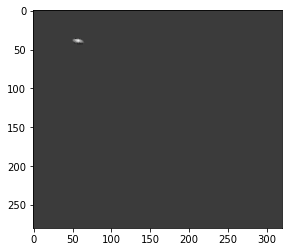

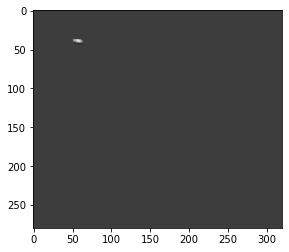

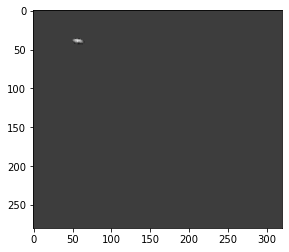

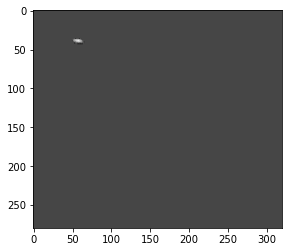

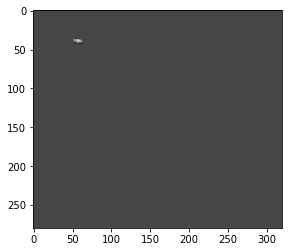

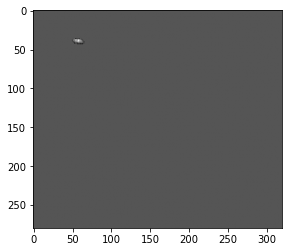

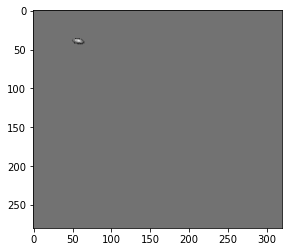

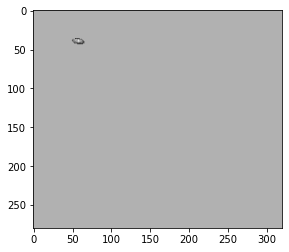

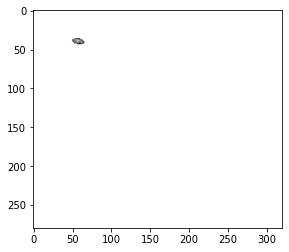

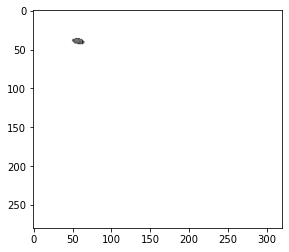

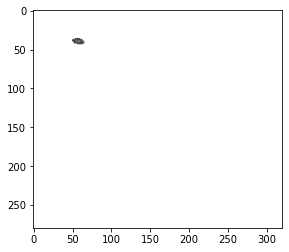

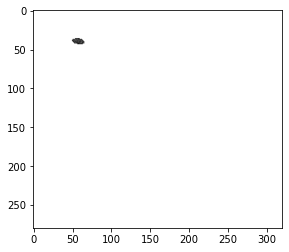

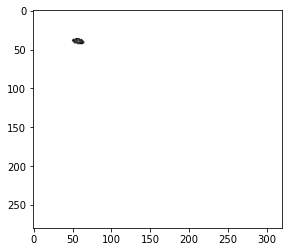

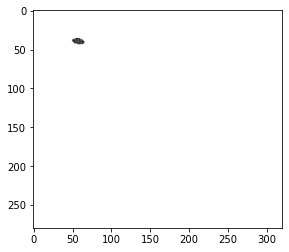

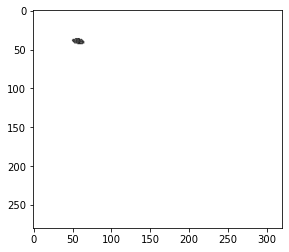

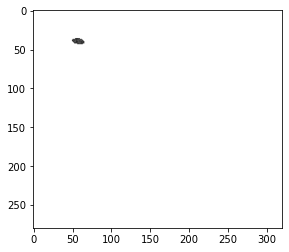

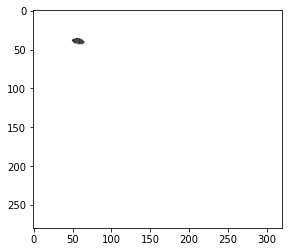

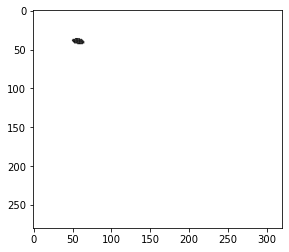

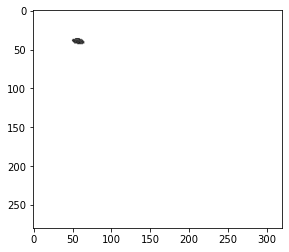

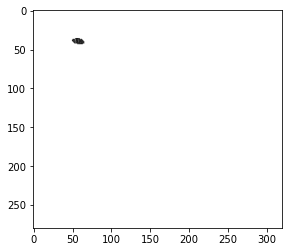

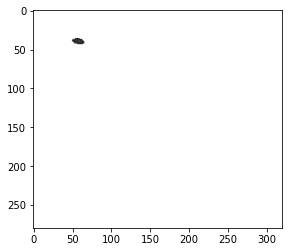

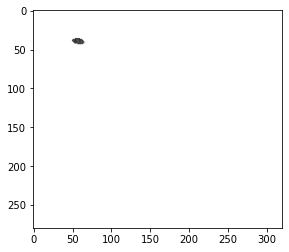

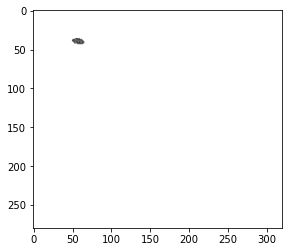

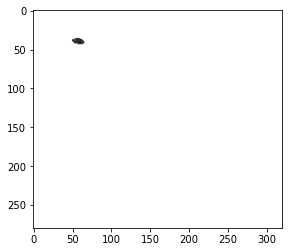

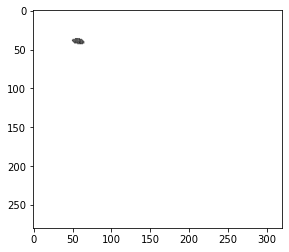

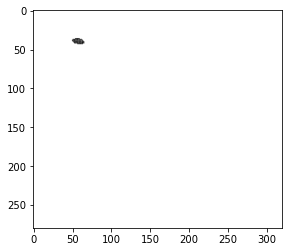

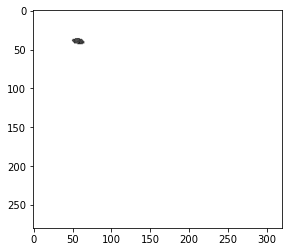

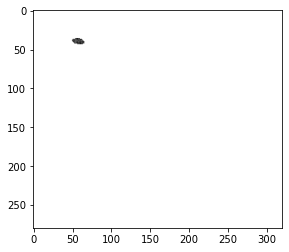

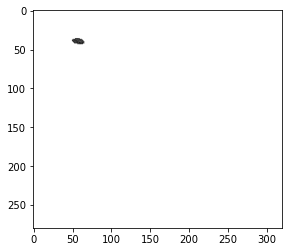

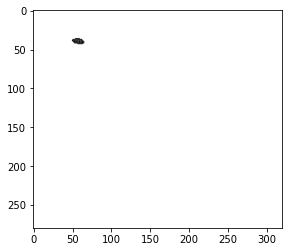

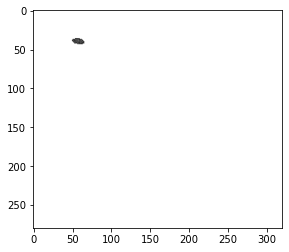

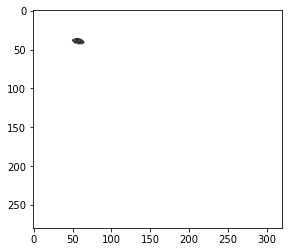

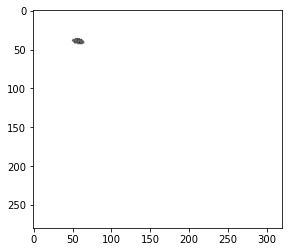

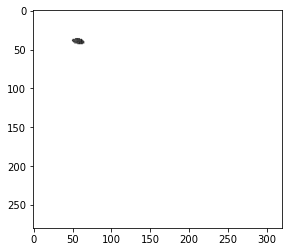

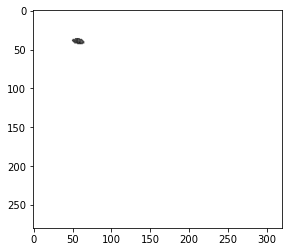

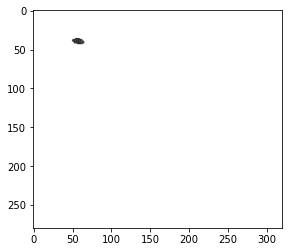

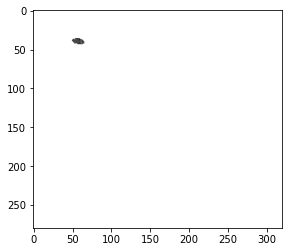

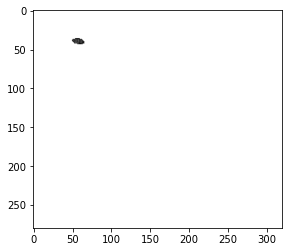

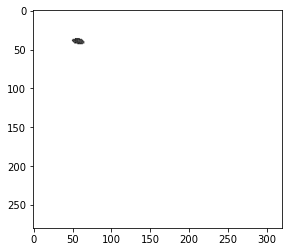

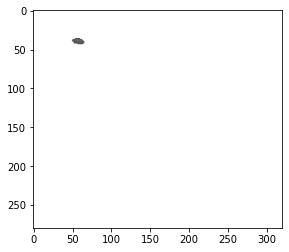

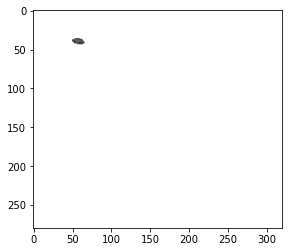

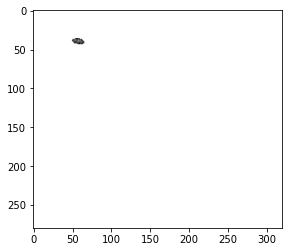

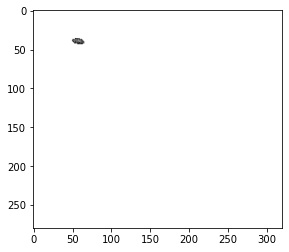

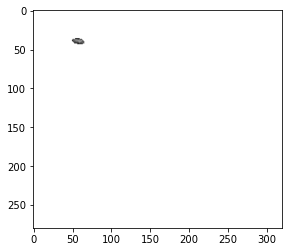

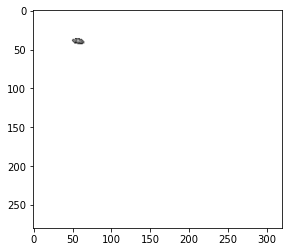

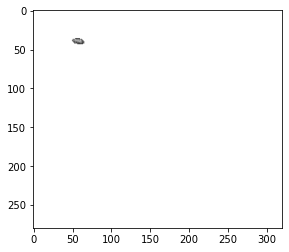

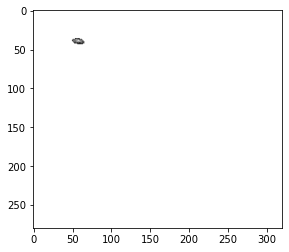

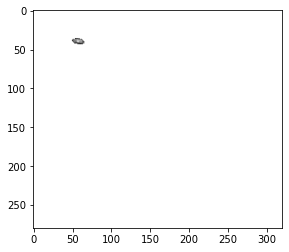

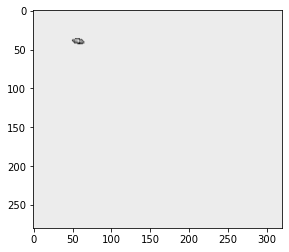

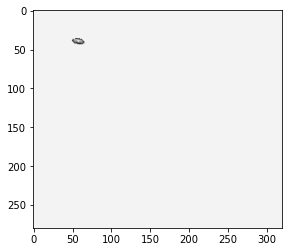

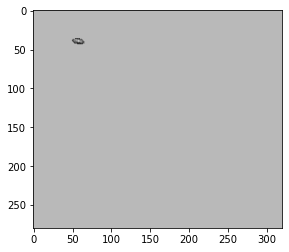

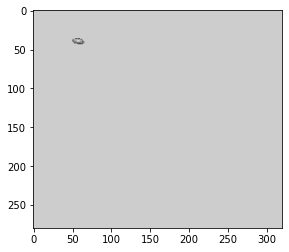

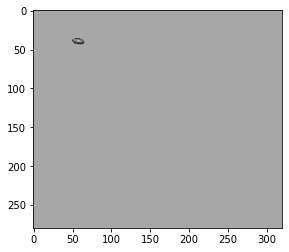

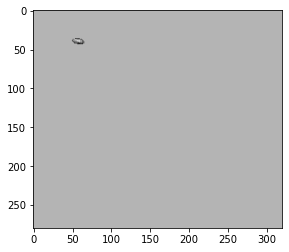

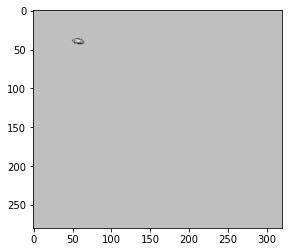

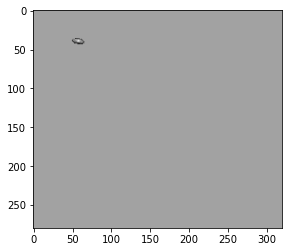

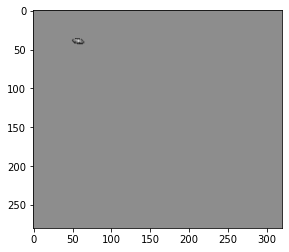

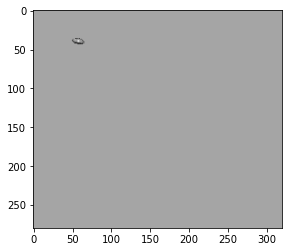

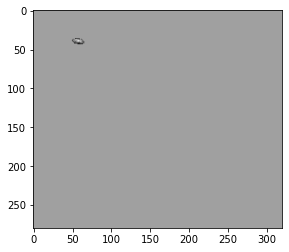

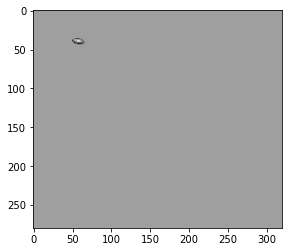

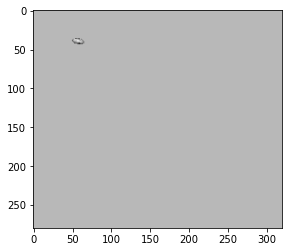

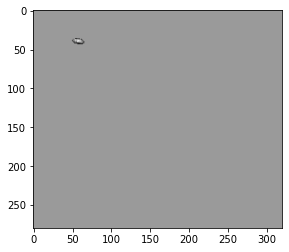

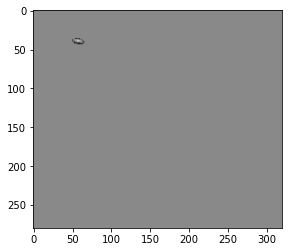

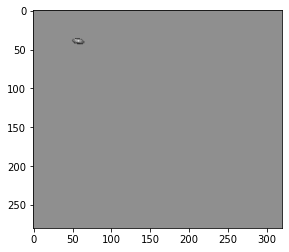

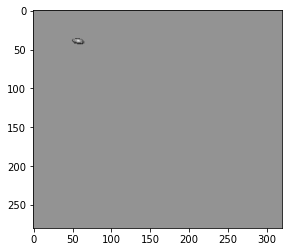

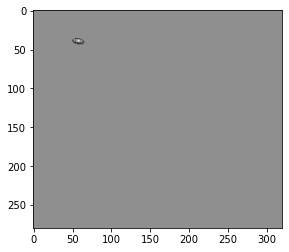

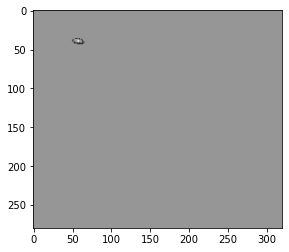

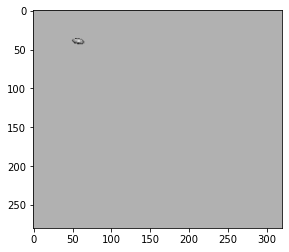

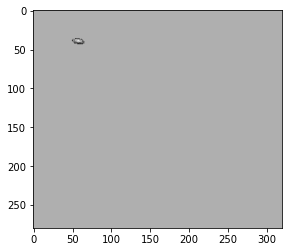

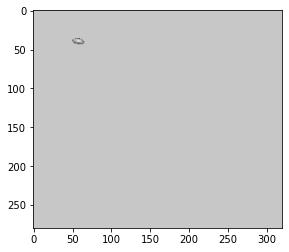

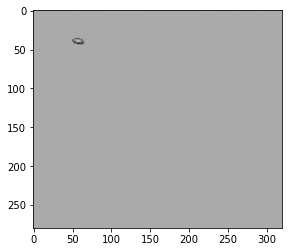

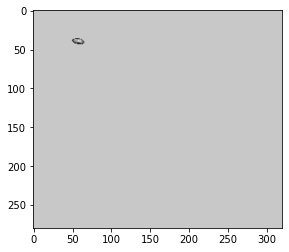

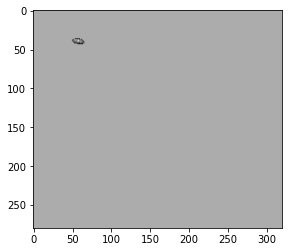

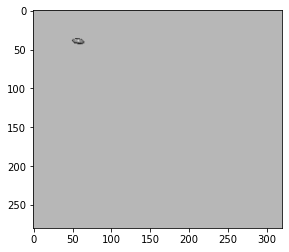

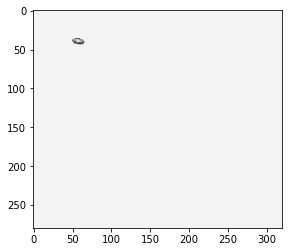

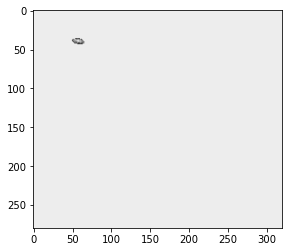

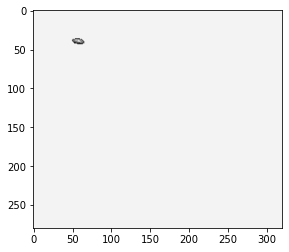

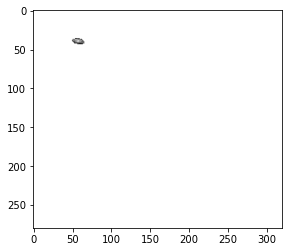

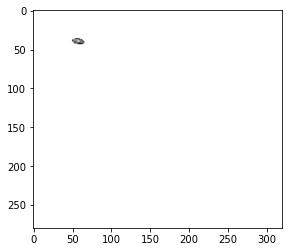

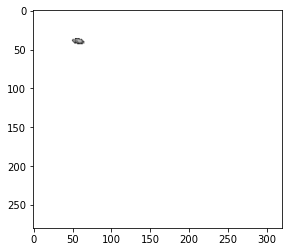

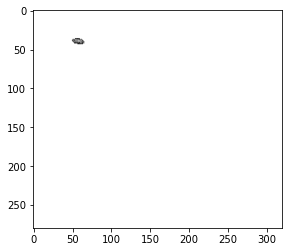

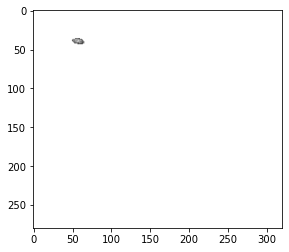

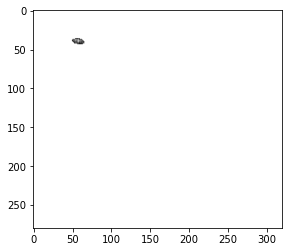

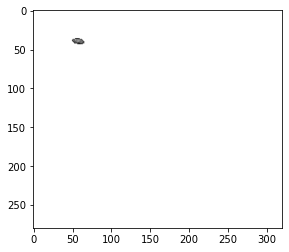

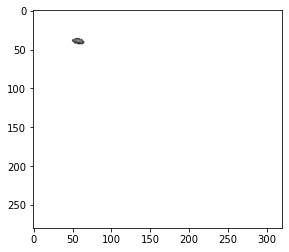

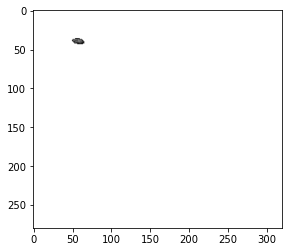

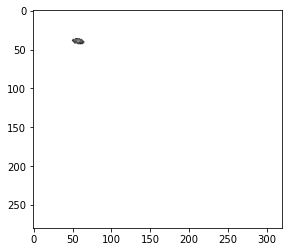

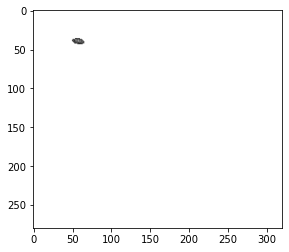

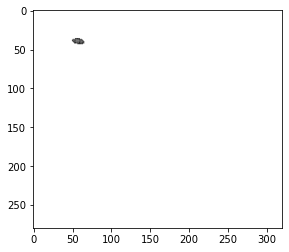

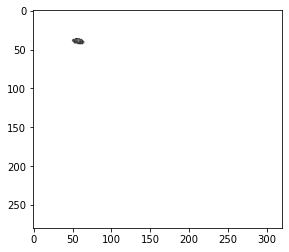

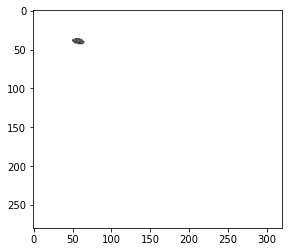

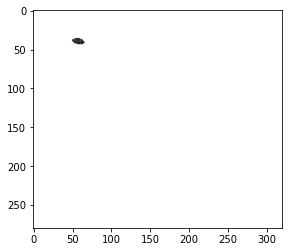

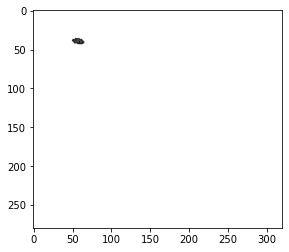

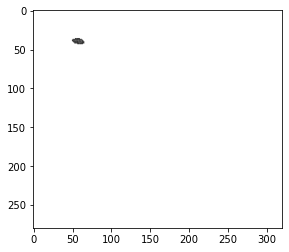

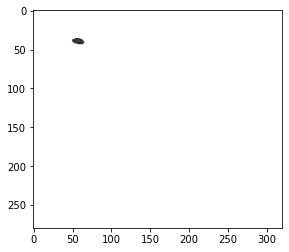

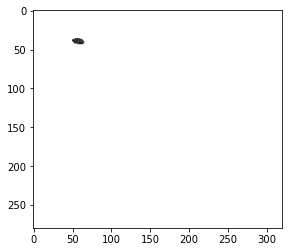

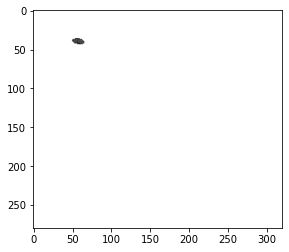

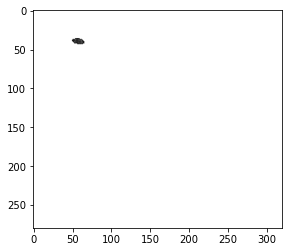

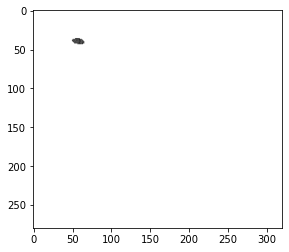

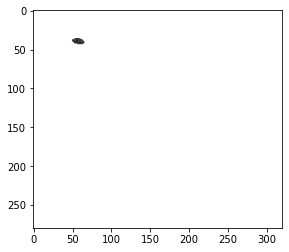

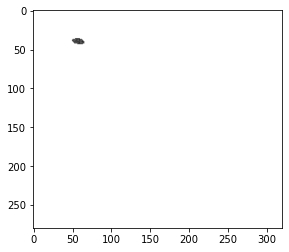

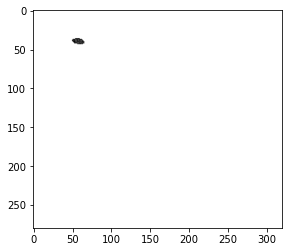

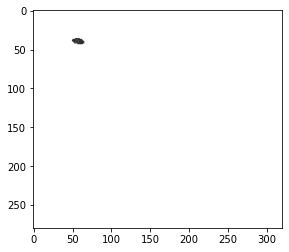

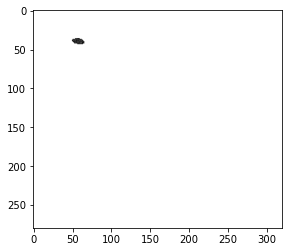

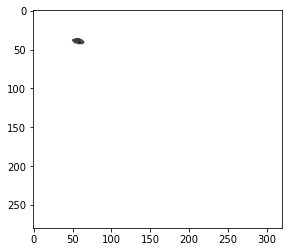

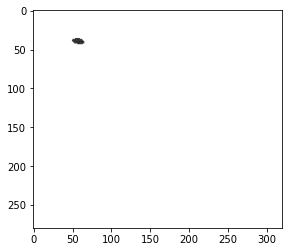

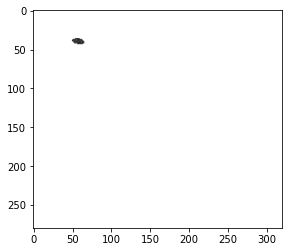

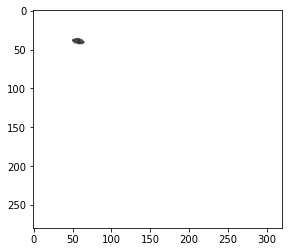

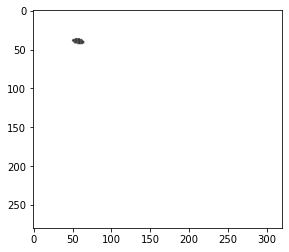

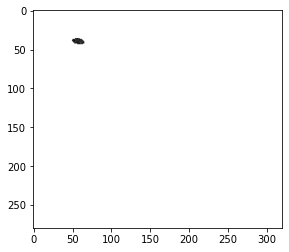

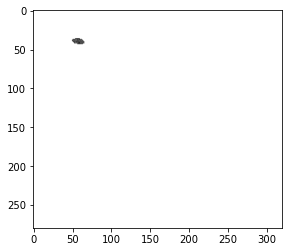

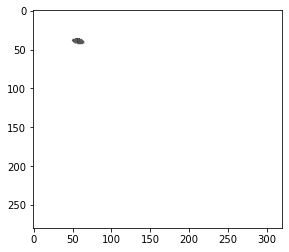

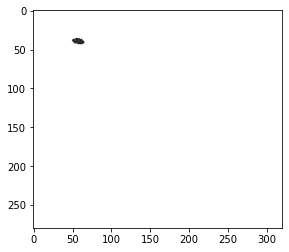

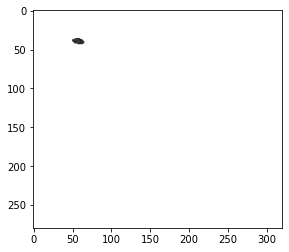

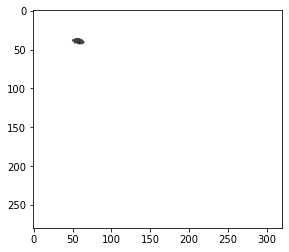

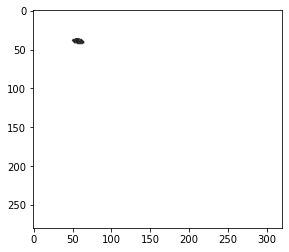

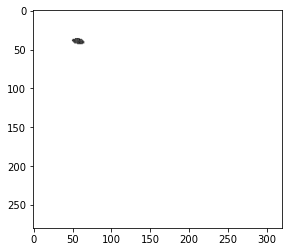

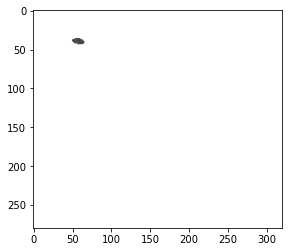

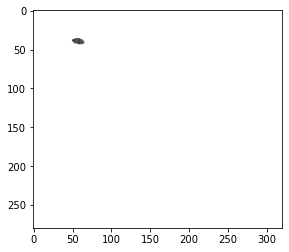

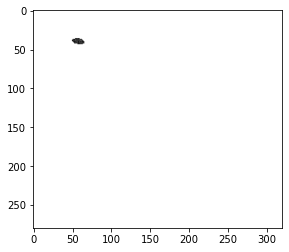

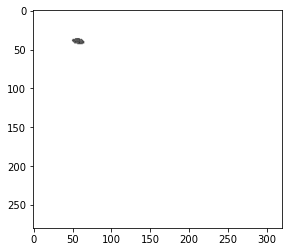

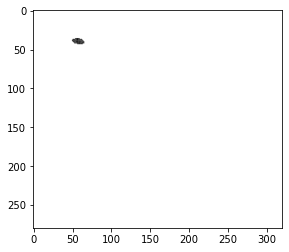

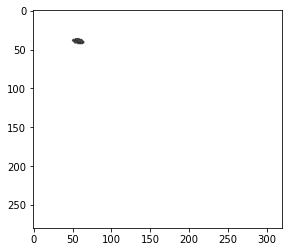

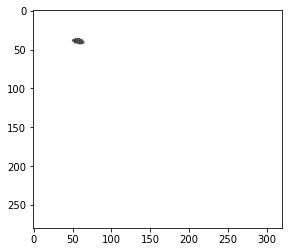

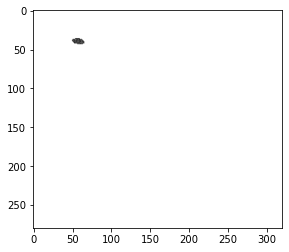

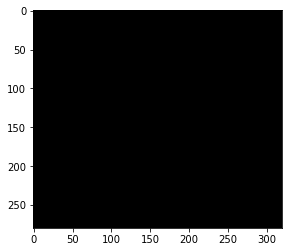

In [182]:
# To apply the mask for each 2D image in each wavelength

for i in range(256):
 sel = np.zeros_like(corrected_nparr[:,:,i])
 sel[mask2] = corrected_nparr[:,:,i][mask2]
 imshow(sel)

In [ ]:
# To load the wavebands or wavelengths as a numpy array 
bands = np.genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Wavelength_Band_NIR.csv', delimiter=',')

No handles with labels found to put in legend.


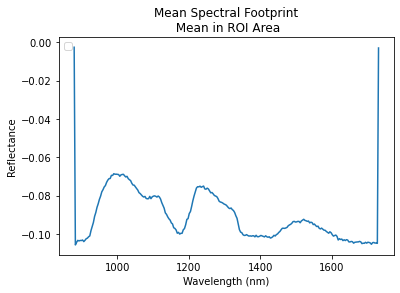

In [188]:
# To calculate the mean spetra for each seed 

spectra = []
spectrum = []
spectrum2 = []

for e in range (50):
 img = corrected_nparr[:,:,50]
 mask2 = labeled_seeds_img == (e+1)
 for j in range(corrected_nparr.shape[0]):
        for k in range(279):
              if mask2[j,k] != 0:
                    a = corrected_nparr[k,j,:]
                    spectrum.append(a)  
 mean_spectra = np.mean(spectrum, axis=0)                   
 spectrum2.append(mean_spectra)            
            
   
   
spectrum2 = np.array(spectrum2)    

 
mean_spectra = spectrum2[5,:]

# To plot the mean spectra for a seed 


plt.plot(bands, mean_spectra)
plt.legend(loc='upper left')
plt.title('Mean Spectral Footprint\n Mean in ROI Area')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()


No handles with labels found to put in legend.


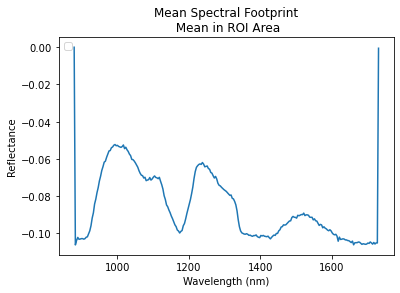

In [186]:
mean_spectra = spectrum2[40,:]




plt.plot(bands, mean_spectra)
plt.legend(loc='upper left')
plt.title('Mean Spectral Footprint\n Mean in ROI Area')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()


In [ ]:
# To trim the mean spectra for the noises at both ends
spectrum2=spectrum2[:,10:240]


In [ ]:
# To save the mean spectra as a numpy array or vector 
np.save("C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/...", spectrum2)